<a href="https://colab.research.google.com/github/DereAbdulhameed/Diabetes-Risk-Prediction-in-the-Early-Stages/blob/main/Copy_of_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# load in the dataset
dir = 'https://raw.githubusercontent.com/DereAbdulhameed/Diabetes-Risk-Prediction-in-the-Early-Stages/main/diabetes_data_upload.csv'
data = pd.read_csv(dir)
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
# inspect the data: It contains 520 rows with 17 columns
data.shape

(520, 17)

In [4]:
# This shows that the data is a clean data with no missing value or noise
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

# Exploratory Data Analysis

## Univariate Analysis

In [5]:
data['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

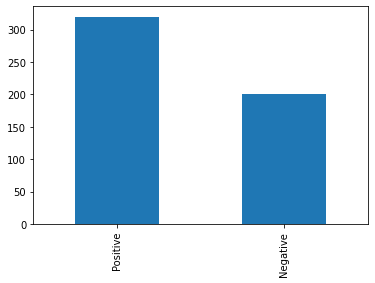

In [6]:
# This shows the difference between the features in the target column and shows that there is no much difference,
# therefore, we might not be considering a resample method
data['class'].value_counts().plot(kind = 'bar')

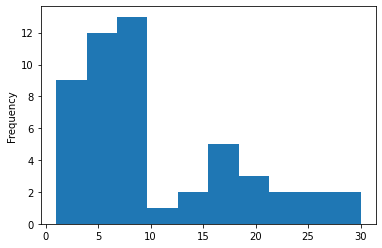

In [7]:
# Age column: This shows that 
data['Age'].value_counts().plot(kind='hist')

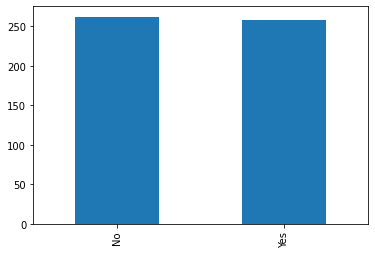

In [8]:
data['Polyuria'].value_counts().plot(kind = 'bar')

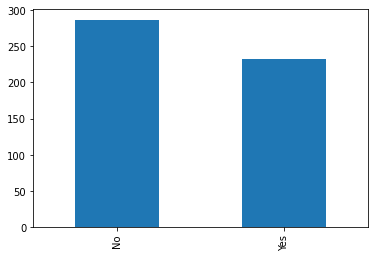

In [9]:
data['Polydipsia'].value_counts().plot(kind = 'bar')

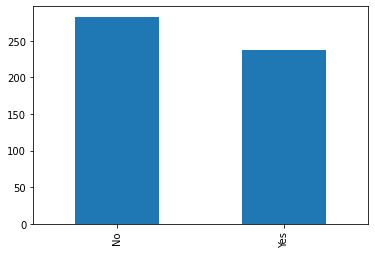

In [10]:
data['Polyphagia'].value_counts().plot(kind = 'bar')


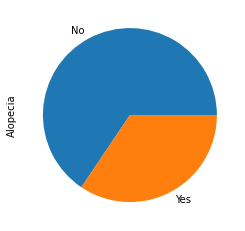

In [11]:
data['Alopecia'].value_counts().plot(kind = 'pie')

## Bivariate Analysis

<Figure size 720x504 with 0 Axes>

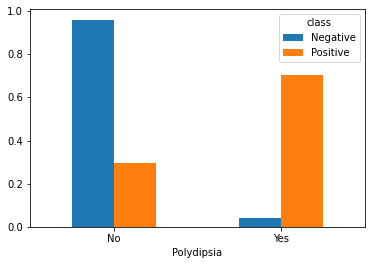

<Figure size 720x504 with 0 Axes>

In [12]:
gender = pd.crosstab(data['Polydipsia'], data['class'])
gender.div(gender.sum().astype(float), axis=1).plot(kind='bar', stacked=False)



plt.xticks(rotation= 0)
plt.figure(figsize= (10,7))

<Figure size 720x504 with 0 Axes>

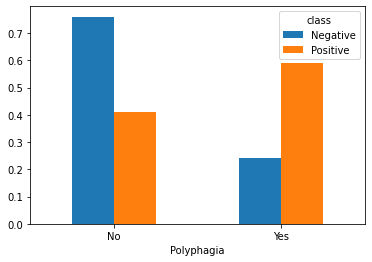

<Figure size 720x504 with 0 Axes>

In [13]:
polyphagia = pd.crosstab(data['Polyphagia'], data['class'])
polyphagia.div(gender.sum().astype(float), axis=1).plot(kind='bar', stacked=False)



plt.xticks(rotation= 0)
plt.figure(figsize= (10,7))

<Figure size 720x504 with 0 Axes>

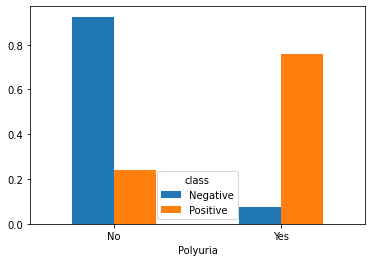

<Figure size 720x504 with 0 Axes>

In [14]:
polyuria = pd.crosstab(data['Polyuria'], data['class'])
polyuria.div(gender.sum().astype(float), axis=1).plot(kind='bar', stacked=False)



plt.xticks(rotation= 0)
plt.figure(figsize= (10,7))
# plt.legend(bbox_to_anchor = (1.02,1))

<Figure size 720x504 with 0 Axes>

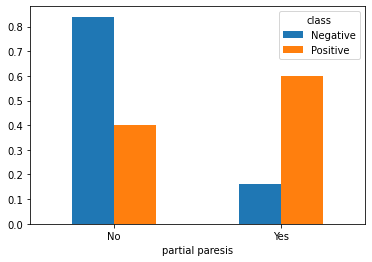

<Figure size 720x504 with 0 Axes>

In [53]:
paresis = pd.crosstab(data['partial paresis'], data['class'])
paresis.div(gender.sum().astype(float), axis=1).plot(kind='bar', stacked=False)



plt.xticks(rotation= 0)
plt.figure(figsize= (10,7))

<Figure size 720x504 with 0 Axes>

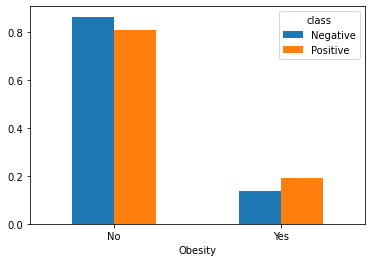

<Figure size 720x504 with 0 Axes>

In [54]:
Obesity = pd.crosstab(data['Obesity'], data['class'])
Obesity.div(gender.sum().astype(float), axis=1).plot(kind='bar', stacked=False)



plt.xticks(rotation= 0)
plt.figure(figsize= (10,7))

<Figure size 720x504 with 0 Axes>

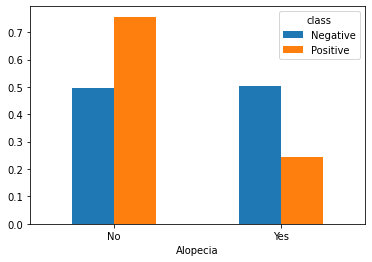

<Figure size 720x504 with 0 Axes>

In [15]:
Alopecia = pd.crosstab(data['Alopecia'], data['class'])
Alopecia.div(gender.sum().astype(float), axis=1).plot(kind='bar', stacked=False)



plt.xticks(rotation= 0)
plt.figure(figsize= (10,7))

# PREPROCESSING

In [21]:
data['Gender'].value_counts()

Male      328
Female    192
Name: Gender, dtype: int64

In [28]:
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 2})
data['Polyuria'] = data['Polyuria'].replace({'Yes': 1, 'No': 2})
data['Polydipsia'] = data['Polydipsia'].replace({'Yes': 1, 'No': 2})
data['sudden weight loss']= data['sudden weight loss'].replace({'Yes': 1, 'No': 2})
data['weakness'] = data['weakness'].replace({'Yes': 1, 'No': 2})
data['Polyphagia'] = data['Polyphagia'].replace({'Yes': 1, 'No': 2})
data['Genital thrush'] = data['Genital thrush'].replace({'Yes': 1, 'No': 2})
data['visual blurring'] = data['visual blurring'].replace({'Yes': 1, 'No': 2})
data['Itching'] = data['Itching'].replace({'Yes': 1, 'No': 2})
data['Irritability'] = data['Irritability'].replace({'Yes': 1, 'No': 2})
data['delayed healing'] = data['delayed healing'].replace({'Yes': 1, 'No': 2})
data['partial paresis'] = data['partial paresis'].replace({'Yes': 1, 'No': 2})
data['muscle stiffness'] = data['muscle stiffness'].replace({'Yes': 1, 'No': 2})
data['Alopecia'] = data['Alopecia'].replace({'Yes': 1, 'No': 2})
data['Obesity'] = data['Obesity'].replace({'Yes': 1, 'No': 2})
data['class'] = data['class'].replace({'Positive': 1, 'Negative': 2})

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

#MODEL BUILDING

In [33]:
X = data.drop(columns = 'class')
y = data['class']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state = 20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(442, 16)
(78, 16)
(442,)
(78,)


In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)


#MODEL EVALUATION

In [46]:
# evaluate Random forest Model
from sklearn.metrics import completeness_score, classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        24

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78



In [45]:
confusion_matrix(y_test, rfc_pred)

array([[54,  0],
       [ 0, 24]])

In [47]:
accuracy_score(y_test, rfc_pred)

1.0